In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 14,            # base font size
    "axes.labelsize": 14,       # x/y labels
    "axes.titlesize": 14,       # title
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "legend.fontsize": 13,
    "figure.dpi": 300
})


In [3]:
def normalize_the_data(flare_data):
    flare_data = np.array(flare_data)
    n_elements = flare_data.shape[0]
    for j in range(flare_data.shape[1]):
        standard_deviation_of_this_feature = np.std(flare_data[:, j])
        median_of_this_feature = np.median(flare_data[:, j])
        for i in range(n_elements):
            flare_data[i, j] = (
                flare_data[i, j] - median_of_this_feature) / (standard_deviation_of_this_feature)
    return flare_data

# Incorrect Normalisation

  Here I am first normalizing the positive and the negative data and then combining it.

In [4]:
positive = pd.read_csv("Data 2024/positive24.csv")
negative = pd.read_csv("Data 2024/negative24.csv")

In [5]:
positive = positive.drop(["Unnamed: 0","HARPNUM","NOAA","Class","Peak Time"],axis =1)
negative = negative.drop(["Unnamed: 0","HARPNUM","NOAA","Class","Peak Time"],axis =1)

In [6]:
positive = normalize_the_data(positive)
negative = normalize_the_data(negative)

In [7]:
data = pd.concat([pd.DataFrame(positive),pd.DataFrame(negative)],axis =0,ignore_index=True)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.457243,0.461748,1.284038,1.532227,1.879932,-0.007119,1.946924,1.195096,2.018535,0.718029,0.674042,-0.109472,-0.235653,0.059798,1.839390,-0.375990,0.253003,0.437244
1,-0.460046,-0.442775,-0.237580,0.527701,1.032157,-0.468423,0.227567,-0.258123,0.875206,-0.515681,0.814316,-0.434698,-0.583938,-0.253666,0.858172,-0.366463,-0.660720,-0.517276
2,0.556846,-0.614251,0.371788,0.309854,-0.166482,0.425102,-0.342679,0.349674,-0.354444,-0.458949,-0.624920,0.391117,0.680859,0.550269,-0.231338,0.206148,0.362213,0.254865
3,-0.420125,0.590192,0.505802,-1.040327,-1.397593,-0.513705,-0.500405,0.858462,-1.235585,0.273079,0.122015,-0.474873,0.073345,-0.635452,-1.283892,-0.361137,-1.265015,-0.091580
4,-0.525714,0.602255,1.999288,0.777482,1.025187,-0.154659,1.600378,2.427120,1.209392,0.603091,1.869104,-0.250438,1.109088,-0.181999,0.922632,-0.191317,0.202038,0.906549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,0.269169,0.945228,-1.298679,0.674639,-0.000321,0.523009,0.824921,-1.154480,0.037751,1.427330,-0.039212,0.290518,0.777020,0.325665,0.045530,0.914784,0.508536,1.258019
1285,0.266889,0.908427,-1.346622,0.680602,0.033030,0.527388,0.820530,-1.201125,0.057929,1.392438,0.025912,0.300642,0.828871,0.331126,0.082040,0.910299,0.540101,1.324951
1286,0.281479,0.934661,-1.304368,0.633747,-0.031182,0.542091,0.751375,-1.169802,-0.023822,1.419138,-0.095457,0.307644,0.734822,0.324892,0.014936,0.901089,0.471711,1.290719
1287,0.280006,0.906653,-1.294784,0.611818,-0.062846,0.537495,0.730941,-1.156590,-0.047124,1.392590,0.306662,0.300486,0.702758,0.309961,-0.014647,0.897220,0.538347,1.271247


In [8]:
from sklearn import svm
number_of_examples = data.shape[0]
C = 4.0
gamma = 0.075
class_weight = "balanced"
clf = svm.SVC(C=C, gamma=gamma, kernel='rbf', class_weight=class_weight,cache_size=500, max_iter=-1, shrinking=True, tol=1e-8, probability=True)

In [9]:
xdata = np.array(data)
ydata = np.concatenate((np.ones(positive.shape[0]), np.zeros(negative.shape[0])), axis=0)

In [10]:
from sklearn.feature_selection import f_classif
from sklearn.datasets import make_classification

from sklearn.feature_selection import SelectKBest, f_classif

N_features = 18

selector = SelectKBest(f_classif, k=N_features)
selector.fit(xdata,ydata)
scores = selector.scores_
print(scores)

[0.20599625 2.1512847  0.34082199 2.0461827  1.11407015 2.91390347
 1.02043498 0.44625673 0.0770315  2.05857723 0.78116088 1.55828849
 0.07803237 2.48514758 0.36928083 0.06233833 2.88923493 0.03811868]


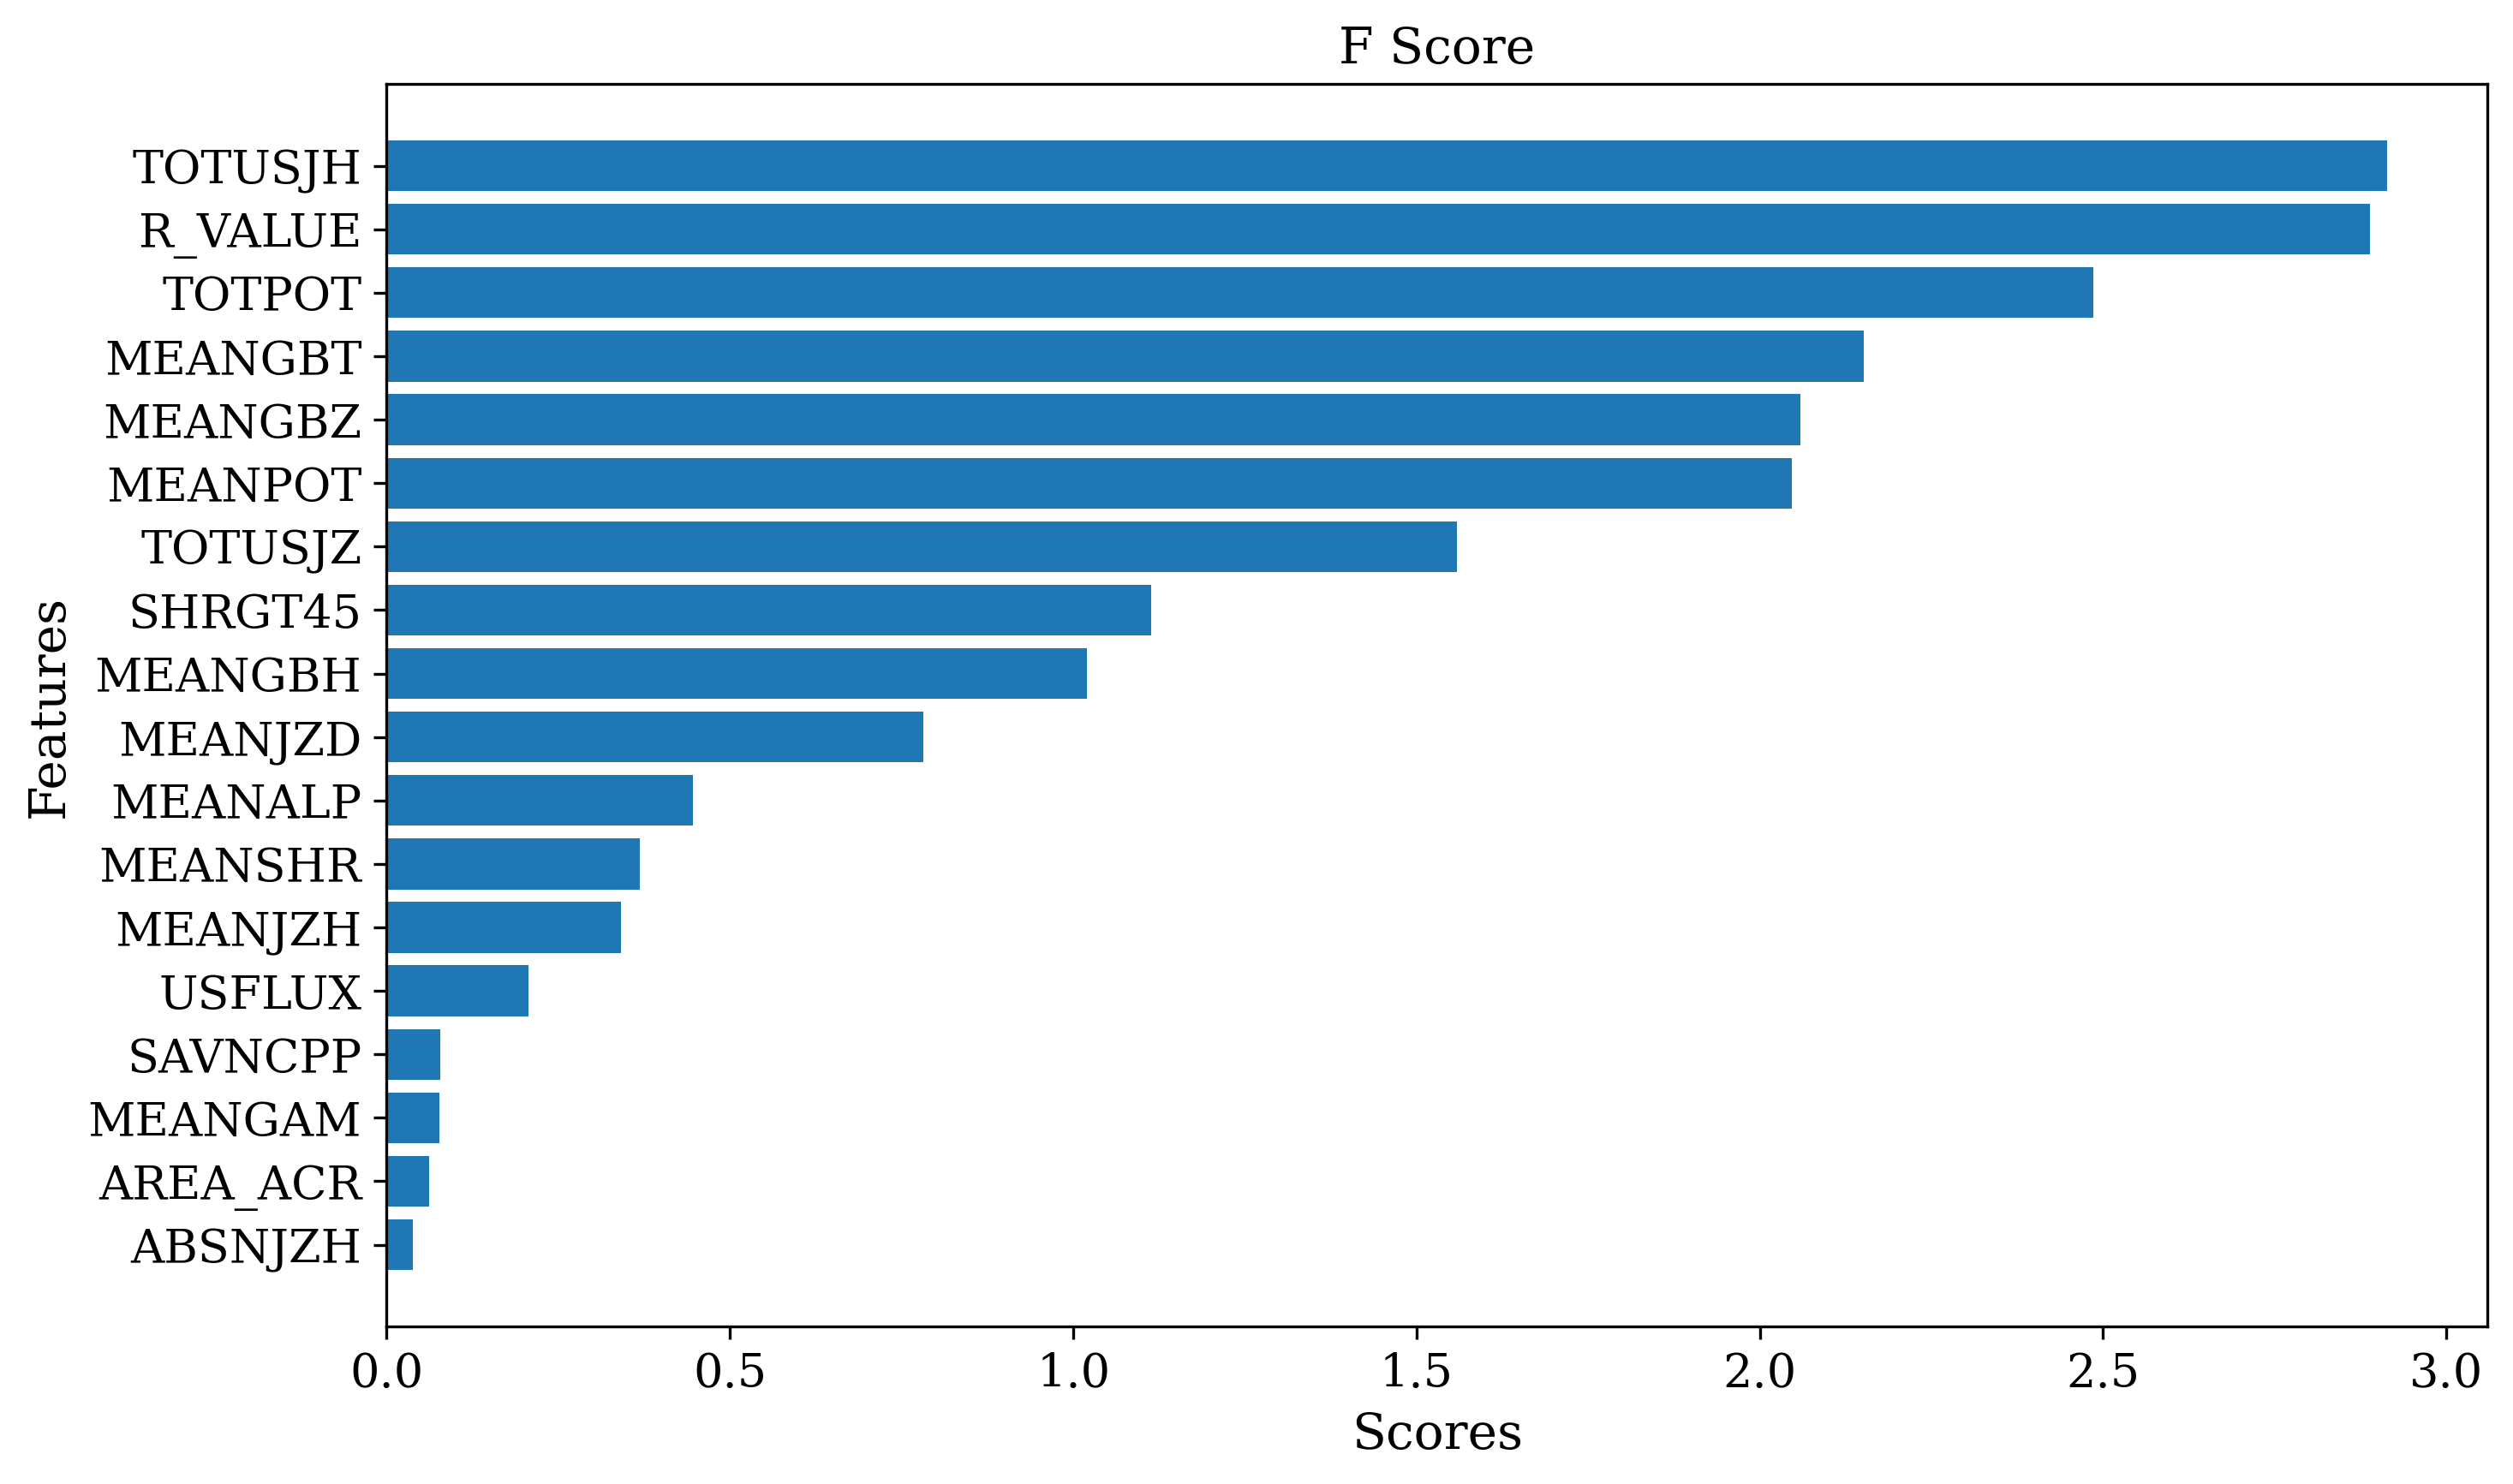

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = ['USFLUX', 'MEANGBT', 'MEANJZH', 'MEANPOT', 'SHRGT45', 'TOTUSJH','MEANGBH', 'MEANALP', 'MEANGAM', 'MEANGBZ', 'MEANJZD', 'TOTUSJZ',
       'SAVNCPP', 'TOTPOT', 'MEANSHR', 'AREA_ACR', 'R_VALUE', 'ABSNJZH']
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': scores}).sort_values('Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('F Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

ordered_features = scores_df['Feature'].tolist()

In [12]:
def confusion_table(pred, labels):
    """
    computes the number of TP, TN, FP, FN events given the arrays with predictions and true labels
    and returns the true skill score

    Args:
    pred: np array with predictions (1 for flare, 0 for nonflare)
    labels: np array with true labels (1 for flare, 0 for nonflare)

    Returns: true negative, false positive, true positive, false negative
    """
    Nobs = len(pred)
    TN = 0.
    TP = 0.
    FP = 0.
    FN = 0.
    for i in range(Nobs):
        if (pred[i] == 0 and labels[i] == 0):
            TN += 1
        elif (pred[i] == 1 and labels[i] == 0):
            FP += 1
        elif (pred[i] == 1 and labels[i] == 1):
            TP += 1
        elif (pred[i] == 0 and labels[i] == 1):
            FN += 1
        else:
            print("Error! Observation could not be classified.")
    return TN, FP, TP, FN

In [13]:
from sklearn.model_selection import StratifiedKFold

# lists to hold the TSS and standard deviation of the TSS
array_of_avg_TSS = np.ndarray([50])
array_of_std_TSS = np.ndarray([50])

# compute the TSS for a variety of k ranging from 2 to 52
# this is to see how the TSS varies as a function of k, and to test if k=10 really makes sense
for k in range(2, 52):
    skf = StratifiedKFold(n_splits=k, shuffle=True,random_state=42)
    these_TSS_for_this_k = []
    for train_index, test_index in skf.split(xdata, ydata):
        # xtrain are the examples in the training set
        xtrain = xdata[train_index]
        # ytrain are the labels in the training set
        ytrain = ydata[train_index]
        # xtest are the examples in the testing set
        xtest = xdata[test_index]
        ytest = ydata[test_index]    # ytest are the labels in the testing set
        clf.fit(xtrain, ytrain)
        TN, FP, TP, FN = confusion_table(clf.predict(xtest), ytest)
        if (((TP+FN) == 0.0) or (FP+TN) == 0.0):
            these_TSS_for_this_k.append(np.nan)
            continue
        else:
            these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
    TSS_k = np.array(these_TSS_for_this_k)
    array_of_avg_TSS[k-2] = np.mean(TSS_k)
    array_of_std_TSS[k-2] = np.std(TSS_k)

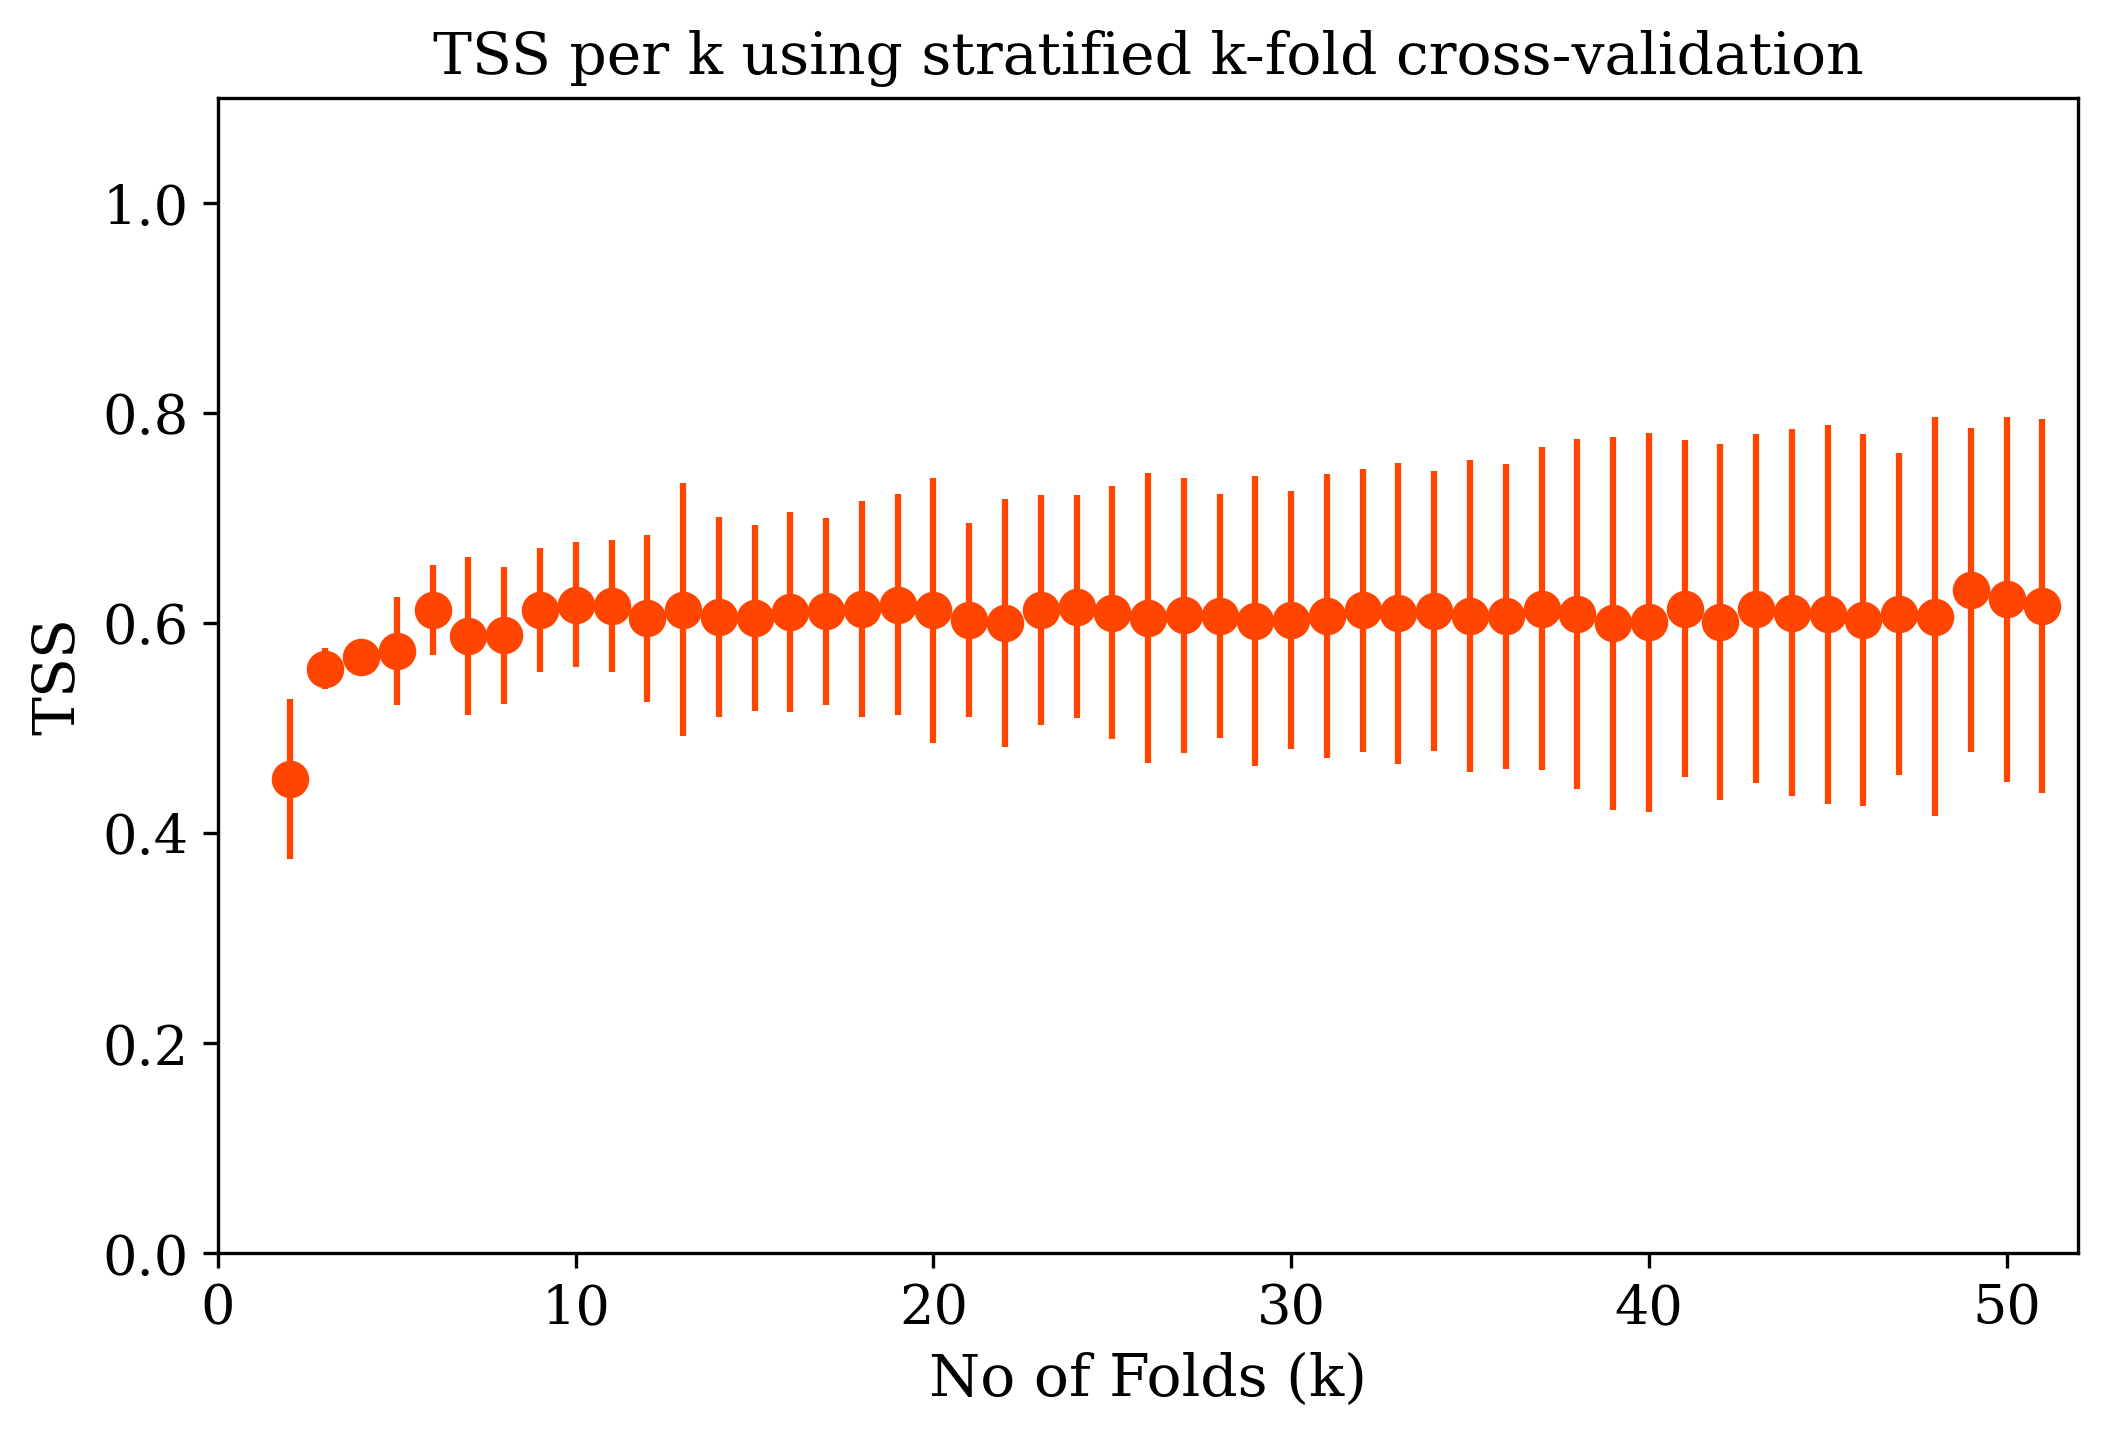

In [14]:
fig, ax = plt.subplots(figsize=(8, 5),dpi = 300)      # define the size of the figure
orangered = (1.0, 0.27, 0, 1.0)              # create an orange-red color
cornblue = (0.39, 0.58, 0.93, 1.0)           # create a cornflower-blue color

# define some style elements
marker_style_red = dict(linestyle='', markersize=8,
                        fillstyle='full', color=orangered, markeredgecolor=orangered)
marker_style_blue = dict(linestyle='', markersize=8,
                         fillstyle='full', color=cornblue, markeredgecolor=cornblue)

# ascribe the data to the axes
k = np.arange(50)+2
for i in range(50):
    if (array_of_avg_TSS[i] > array_of_std_TSS[i]):
        ax.errorbar(k[i], array_of_avg_TSS[i],yerr=array_of_std_TSS[i], linestyle='', color=orangered)
        ax.plot(k[i], array_of_avg_TSS[i], 'o', **marker_style_red)
    if (array_of_avg_TSS[i] <= array_of_std_TSS[i]):
        ax.errorbar(k[i], array_of_avg_TSS[i],yerr=array_of_std_TSS[i], linestyle='', color=cornblue)
        ax.plot(k[i], array_of_avg_TSS[i], 'o', **marker_style_blue)

# set plot limits
plt.xlim(xmax=52, xmin=0)
plt.ylim(ymax=1.1, ymin=0)

# label the axes and the plot
ax.set_xlabel('No of Folds (k)')
ax.set_ylabel('TSS')
plt.title(r'TSS per k using stratified k-fold cross-validation')
fig = plt.gcf()

In [15]:
print("The TSS equals", array_of_avg_TSS[9],"plus or minus", array_of_std_TSS[9], ".")

The TSS equals 0.616346062505937 plus or minus 0.06258418576789415 .


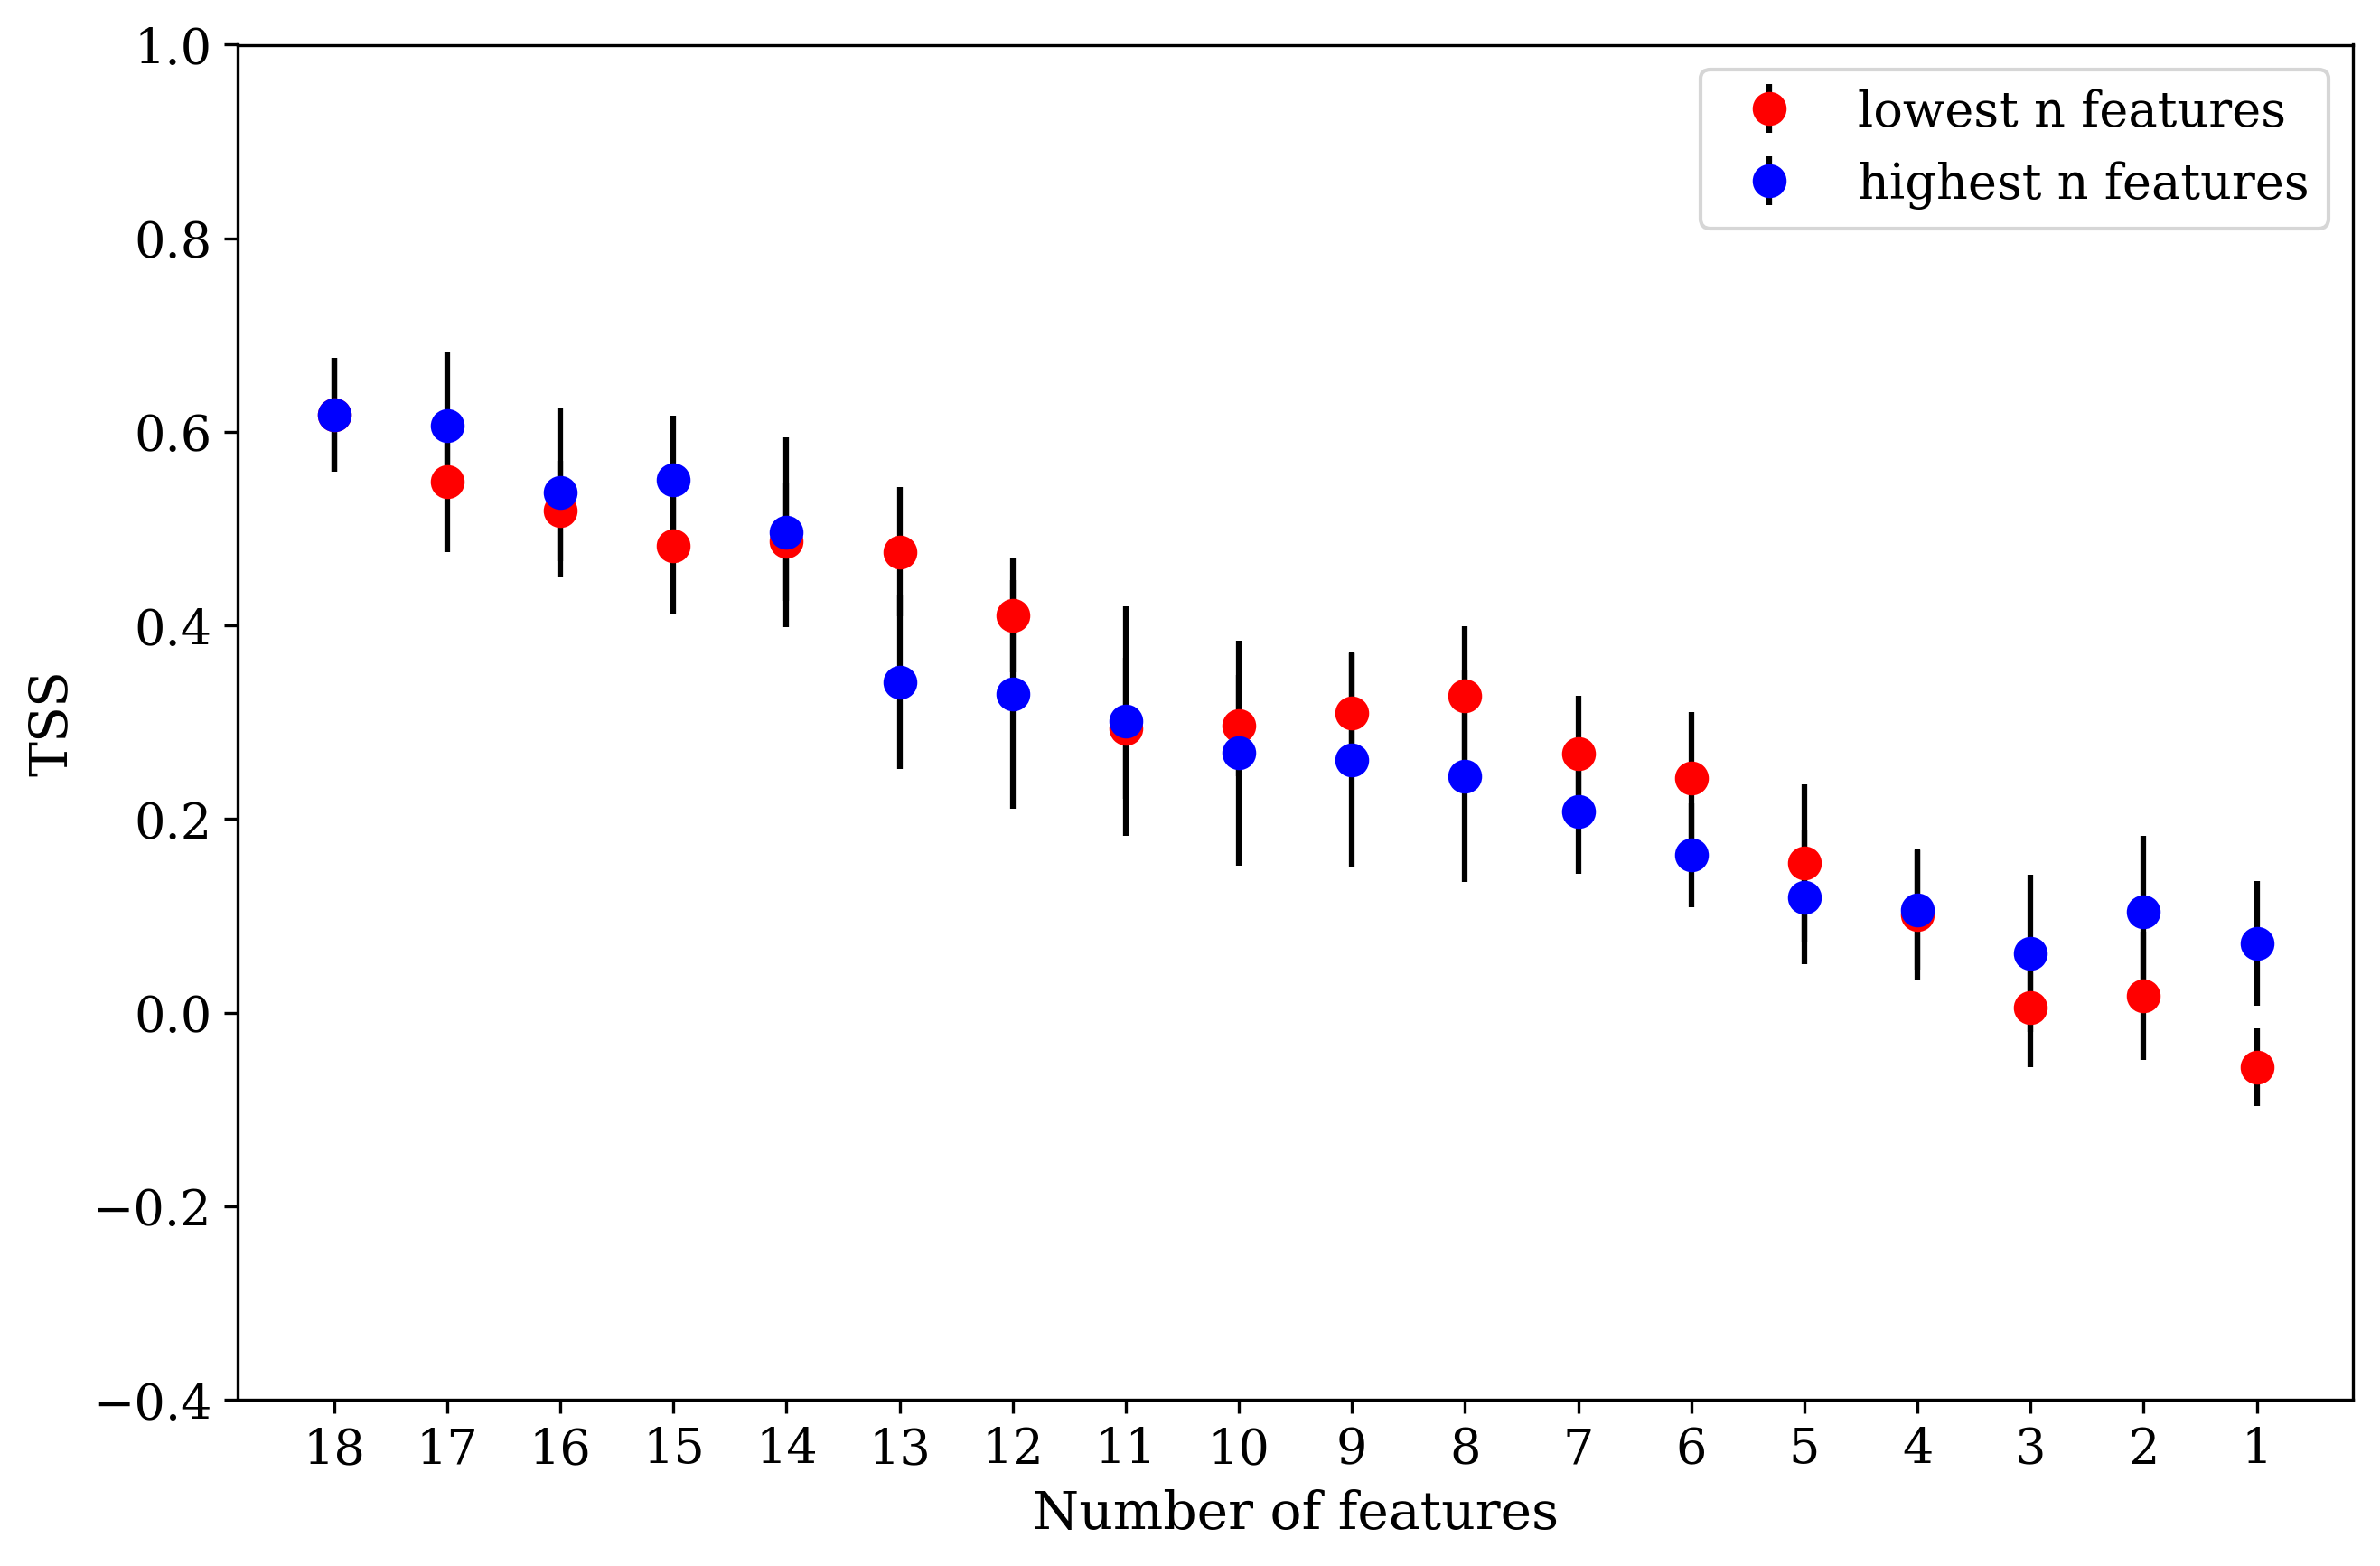

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

num_features = list(range(1, len(ordered_features)+1))

tss_means_high2low = []
tss_stds_high2low = []
tss_means_low2high = []
tss_stds_low2high = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# High to Low ranking (blue dots)
for k in num_features:
    selected_features = ordered_features[:k]
    selected_indices = [feature_names.index(f) for f in selected_features]
    X_subset = xdata[:, selected_indices]
    skf = StratifiedKFold(n_splits=10, shuffle=True,random_state=42)
    these_TSS_for_this_k = []
    for train_index, test_index in skf.split(X_subset, ydata):
        # xtrain are the examples in the training set
        xtrain = X_subset[train_index]
        # ytrain are the labels in the training set
        ytrain = ydata[train_index]
        # xtest are the examples in the testing set
        xtest = X_subset[test_index]
        ytest = ydata[test_index]    # ytest are the labels in the testing set
        clf.fit(xtrain, ytrain)
        TN, FP, TP, FN = confusion_table(clf.predict(xtest), ytest)
        if (((TP+FN) == 0.0) or (FP+TN) == 0.0):
            these_TSS_for_this_k.append(np.nan)
            continue
        else:
            these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
    TSS_k = np.array(these_TSS_for_this_k)
    mean_tss, std_tss = np.mean(TSS_k), np.std(TSS_k)
    tss_means_high2low.append(mean_tss)
    tss_stds_high2low.append(std_tss)

# Low to High ranking (red dots)
for k in num_features:
    selected_features = ordered_features[::-1][:k]
    selected_indices = [feature_names.index(f) for f in selected_features]
    X_subset = xdata[:, selected_indices]
    skf = StratifiedKFold(n_splits=10, shuffle=True,random_state=42)
    these_TSS_for_this_k = []
    for train_index, test_index in skf.split(X_subset, ydata):
        # xtrain are the examples in the training set
        xtrain = X_subset[train_index]
        # ytrain are the labels in the training set
        ytrain = ydata[train_index]
        # xtest are the examples in the testing set
        xtest = X_subset[test_index]
        ytest = ydata[test_index]    # ytest are the labels in the testing set
        clf.fit(xtrain, ytrain)
        TN, FP, TP, FN = confusion_table(clf.predict(xtest), ytest)
        if (((TP+FN) == 0.0) or (FP+TN) == 0.0):
            these_TSS_for_this_k.append(np.nan)
            continue
        else:
            these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
    TSS_k = np.array(these_TSS_for_this_k)
    tss_means_low2high.append(np.mean(TSS_k))
    tss_stds_low2high.append(np.std(TSS_k))

# Plot
plt.figure(figsize=(9, 6), dpi = 300)
plt.errorbar(num_features, tss_means_low2high, yerr=tss_stds_low2high, color='black', label='lowest n features', fmt='o', markerfacecolor='red', markeredgecolor='red', markersize=8)

plt.errorbar(num_features, tss_means_high2low, yerr=tss_stds_high2low, color='black', label='highest n features', fmt='o', markerfacecolor='blue', markeredgecolor='blue', markersize=8)

plt.xlabel('Number of features')
plt.ylabel('TSS')
plt.xticks(num_features)
plt.yticks(np.arange(-0.4, 1.2, 0.2))

plt.legend()
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

In [17]:
no_features = [i for i in range(1,19)]
table = pd.DataFrame({'Number of features': no_features,
                          'TSS highest to lowest': tss_means_high2low,
                          'Std highest to lowest': tss_stds_high2low,
                          'TSS lowest to highest': tss_means_low2high,
                          'Std lowest to highest': tss_stds_low2high})
table

,Number of features,TSS highest to lowest,Std highest to lowest,TSS lowest to highest,Std lowest to highest
0,1,0.071647,0.064526,-0.056215,0.039865
1,2,0.104507,0.078076,0.017817,0.066353
2,3,0.061605,0.081039,0.005037,0.060938
3,4,0.105842,0.061663,0.101279,0.067630
4,5,0.119487,0.069716,0.154530,0.081703
5,6,0.162858,0.053686,0.242578,0.067840
6,7,0.208212,0.065056,0.267513,0.059851
7,8,0.243899,0.109285,0.327166,0.072220
8,9,0.260678,0.110727,0.309606,0.063135
9,10,0.268257,0.116042,0.296648,0.052365


# Correct Normalisation

  Here I am first combining the positive and the negative data and then normalizing it.

In [18]:
positive = pd.read_csv("Data 2024/positive24.csv")
negative = pd.read_csv("Data 2024/negative24.csv")

In [19]:
data = pd.concat([positive,negative],axis =0,ignore_index=True)
data

,Unnamed: 0,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,...,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,HARPNUM,NOAA,Class,Peak Time
0,0,2.246101e+22,107.736,0.021724,15533.100,54.882,2975.118,77.983,0.041413,59.541,...,1.226148e+13,7.077275e+23,50.329,945.314636,4.805,745.287,377,11158,X2.2,2011.02.14_01:56_TAI
1,1,2.235615e+22,93.863,-0.001943,10914.060,44.178,1636.710,56.639,-0.003942,50.680,...,3.884153e+12,4.733711e+23,43.479,961.502686,4.303,63.441,401,11166,M2.0,2011.03.06_14:30_TAI
2,2,6.039302e+22,91.233,0.007535,9912.353,29.044,4229.148,49.560,0.015028,41.150,...,3.430647e+13,1.074422e+24,35.873,1934.446167,4.865,615.008,393,11164,M3.7,2011.03.06_20:12_TAI
3,3,2.384940e+22,109.706,0.009620,3703.910,13.500,1505.331,47.602,0.030907,34.321,...,1.969386e+13,1.879337e+23,28.525,970.551636,3.971,367.530,637,11226,M2.5,2011.06.06_06:41_TAI
4,4,1.989983e+22,109.891,0.032849,12062.610,44.090,2547.054,73.681,0.079865,53.270,...,4.460671e+13,5.269515e+23,43.929,1259.099854,4.777,1080.528,750,11261,M6.0,2011.08.02_13:48_TAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,961,6.068721e+22,113.223,-0.018846,13089.460,33.902,6105.217,65.565,-0.032996,45.425,...,3.698424e+13,1.329793e+24,39.109,3663.961670,5.162,1441.706,12471,13936,M1.2,2024.12.29_17:30_TAI
1285,962,6.058633e+22,112.725,-0.019508,13116.960,34.317,6120.661,65.513,-0.034247,45.580,...,3.834556e+13,1.335375e+24,39.362,3655.612793,5.180,1495.448,12471,13936,M1.6,2024.12.29_17:42_TAI
1286,963,6.123191e+22,113.080,-0.018925,12900.890,33.518,6172.515,64.694,-0.033407,44.952,...,3.587639e+13,1.329003e+24,38.897,3638.466797,5.141,1467.962,12471,13936,M1.6,2024.12.29_18:24_TAI
1287,964,6.116673e+22,112.701,-0.018793,12799.770,33.124,6156.305,64.452,-0.033052,44.773,...,3.503456e+13,1.313741e+24,38.692,3631.264404,5.179,1452.327,12471,13936,M1.7,2024.12.29_18:33_TAI


In [20]:
data = data.drop(["Unnamed: 0","HARPNUM","NOAA","Class","Peak Time"],axis =1)
data

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH
0,2.246101e+22,107.736,0.021724,15533.100,54.882,2975.118,77.983,0.041413,59.541,117.582,0.104880,5.032922e+13,1.226148e+13,7.077275e+23,50.329,945.314636,4.805,745.287
1,2.235615e+22,93.863,-0.001943,10914.060,44.178,1636.710,56.639,-0.003942,50.680,99.163,0.130367,3.344854e+13,3.884153e+12,4.733711e+23,43.479,961.502686,4.303,63.441
2,6.039302e+22,91.233,0.007535,9912.353,29.044,4229.148,49.560,0.015028,41.150,100.010,-0.131131,7.631205e+13,3.430647e+13,1.074422e+24,35.873,1934.446167,4.865,615.008
3,2.384940e+22,109.706,0.009620,3703.910,13.500,1505.331,47.602,0.030907,34.321,110.939,0.004581,3.136324e+13,1.969386e+13,1.879337e+23,28.525,970.551636,3.971,367.530
4,1.989983e+22,109.891,0.032849,12062.610,44.090,2547.054,73.681,0.079865,53.270,115.866,0.322013,4.301247e+13,4.460671e+13,5.269515e+23,43.929,1259.099854,4.777,1080.528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,6.068721e+22,113.223,-0.018846,13089.460,33.902,6105.217,65.565,-0.032996,45.425,126.593,-0.000505,9.279895e+13,3.698424e+13,1.329793e+24,39.109,3663.961670,5.162,1441.706
1285,6.058633e+22,112.725,-0.019508,13116.960,34.317,6120.661,65.513,-0.034247,45.580,126.133,0.011053,9.341332e+13,3.834556e+13,1.335375e+24,39.362,3655.612793,5.180,1495.448
1286,6.123191e+22,113.080,-0.018925,12900.890,33.518,6172.515,64.694,-0.033407,44.952,126.485,-0.010487,9.383820e+13,3.587639e+13,1.329003e+24,38.897,3638.466797,5.141,1467.962
1287,6.116673e+22,112.701,-0.018793,12799.770,33.124,6156.305,64.452,-0.033052,44.773,126.135,0.060878,9.340384e+13,3.503456e+13,1.313741e+24,38.692,3631.264404,5.179,1452.327


In [21]:
data.shape

(1289, 18)

In [22]:
data_n1 = normalize_the_data(data)
xdata = data_n1
ydata = np.concatenate((np.ones(positive.shape[0]), np.zeros(negative.shape[0])), axis=0)

In [23]:
from sklearn.feature_selection import f_classif
from sklearn.datasets import make_classification

from sklearn.feature_selection import SelectKBest, f_classif

N_features = 18

selector = SelectKBest(f_classif, k=N_features)
selector.fit(xdata,ydata)
scores = selector.scores_
print(scores)

[1.26047003e+01 2.09908986e+00 5.27309334e+00 1.29967479e+01
 5.68349972e+00 2.37879696e+01 1.26333099e+01 7.57706085e+00
 4.93615075e+00 7.27577593e+00 1.37903598e+00 1.96258847e+01
 7.15396693e-03 2.55086119e+01 5.39756742e+00 1.49937919e+01
 1.52254359e+01 5.69675893e-01]


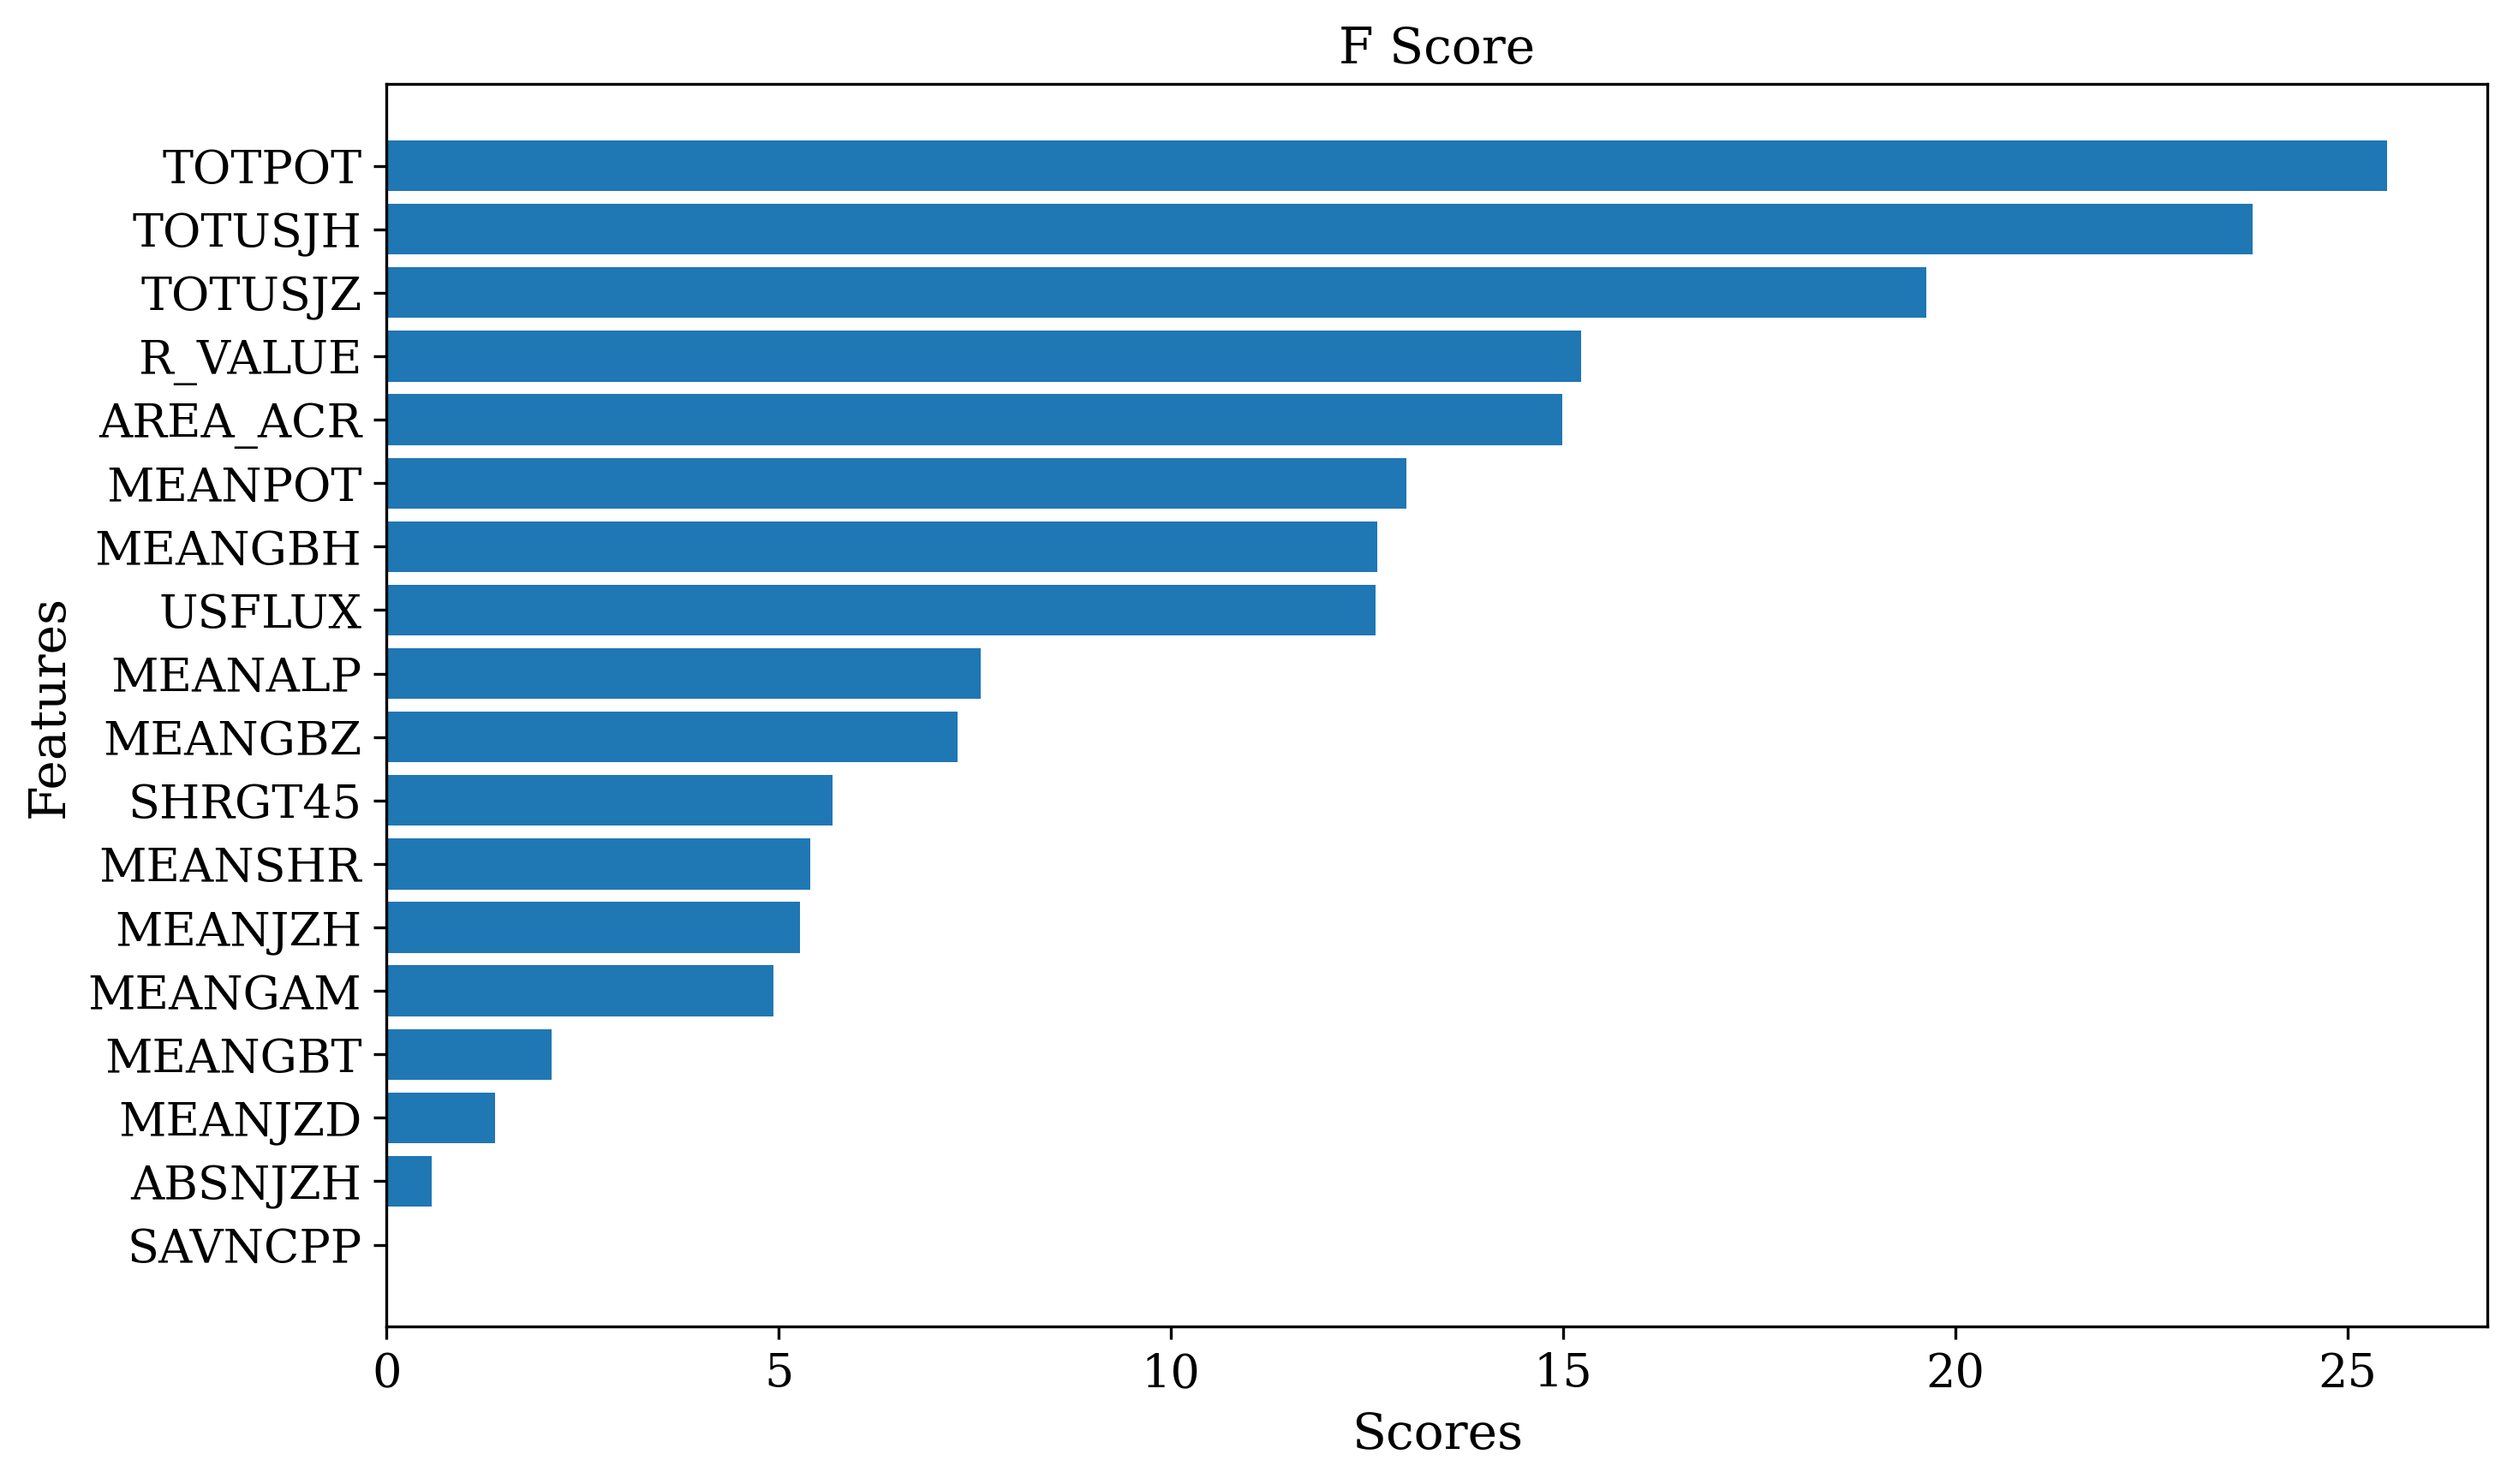

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = ['USFLUX', 'MEANGBT', 'MEANJZH', 'MEANPOT', 'SHRGT45', 'TOTUSJH','MEANGBH', 'MEANALP', 'MEANGAM', 'MEANGBZ', 'MEANJZD', 'TOTUSJZ',
       'SAVNCPP', 'TOTPOT', 'MEANSHR', 'AREA_ACR', 'R_VALUE', 'ABSNJZH']
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': scores}).sort_values('Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('F Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

ordered_features = scores_df['Feature'].tolist()

In [25]:
from sklearn import svm
number_of_examples = data.shape[0]
C = 4.0
gamma = 0.075
class_weight = "balanced"
clf = svm.SVC(C=C, gamma=gamma, kernel='rbf', class_weight=class_weight,cache_size=500, max_iter=-1, shrinking=True, tol=1e-8, probability=True)

In [26]:
def confusion_table(pred, labels):
    """
    computes the number of TP, TN, FP, FN events given the arrays with predictions and true labels
    and returns the true skill score

    Args:
    pred: np array with predictions (1 for flare, 0 for nonflare)
    labels: np array with true labels (1 for flare, 0 for nonflare)

    Returns: true negative, false positive, true positive, false negative
    """
    Nobs = len(pred)
    TN = 0.
    TP = 0.
    FP = 0.
    FN = 0.
    for i in range(Nobs):
        if (pred[i] == 0 and labels[i] == 0):
            TN += 1
        elif (pred[i] == 1 and labels[i] == 0):
            FP += 1
        elif (pred[i] == 1 and labels[i] == 1):
            TP += 1
        elif (pred[i] == 0 and labels[i] == 1):
            FN += 1
        else:
            print("Error! Observation could not be classified.")
    return TN, FP, TP, FN

In [27]:
from sklearn.model_selection import StratifiedKFold

# lists to hold the TSS and standard deviation of the TSS
array_of_avg_TSS = np.ndarray([50])
array_of_std_TSS = np.ndarray([50])

# xdata are the examples
# ydata are the labels
xdata = data_n1
ydata = np.concatenate((np.ones(positive.shape[0]), np.zeros(negative.shape[0])), axis=0)

# compute the TSS for a variety of k ranging from 2 to 52
# this is to see how the TSS varies as a function of k, and to test if k=10 really makes sense
for k in range(2, 52):
    skf = StratifiedKFold(n_splits=k, shuffle=True,random_state=42)
    these_TSS_for_this_k = []
    for train_index, test_index in skf.split(xdata, ydata):
        # xtrain are the examples in the training set
        xtrain = xdata[train_index]
        # ytrain are the labels in the training set
        ytrain = ydata[train_index]
        # xtest are the examples in the testing set
        xtest = xdata[test_index]
        ytest = ydata[test_index]    # ytest are the labels in the testing set
        clf.fit(xtrain, ytrain)
        TN, FP, TP, FN = confusion_table(clf.predict(xtest), ytest)
        if (((TP+FN) == 0.0) or (FP+TN) == 0.0):
            these_TSS_for_this_k.append(np.nan)
            continue
        else:
            these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
    TSS_k = np.array(these_TSS_for_this_k)
    array_of_avg_TSS[k-2] = np.mean(TSS_k)
    array_of_std_TSS[k-2] = np.std(TSS_k)

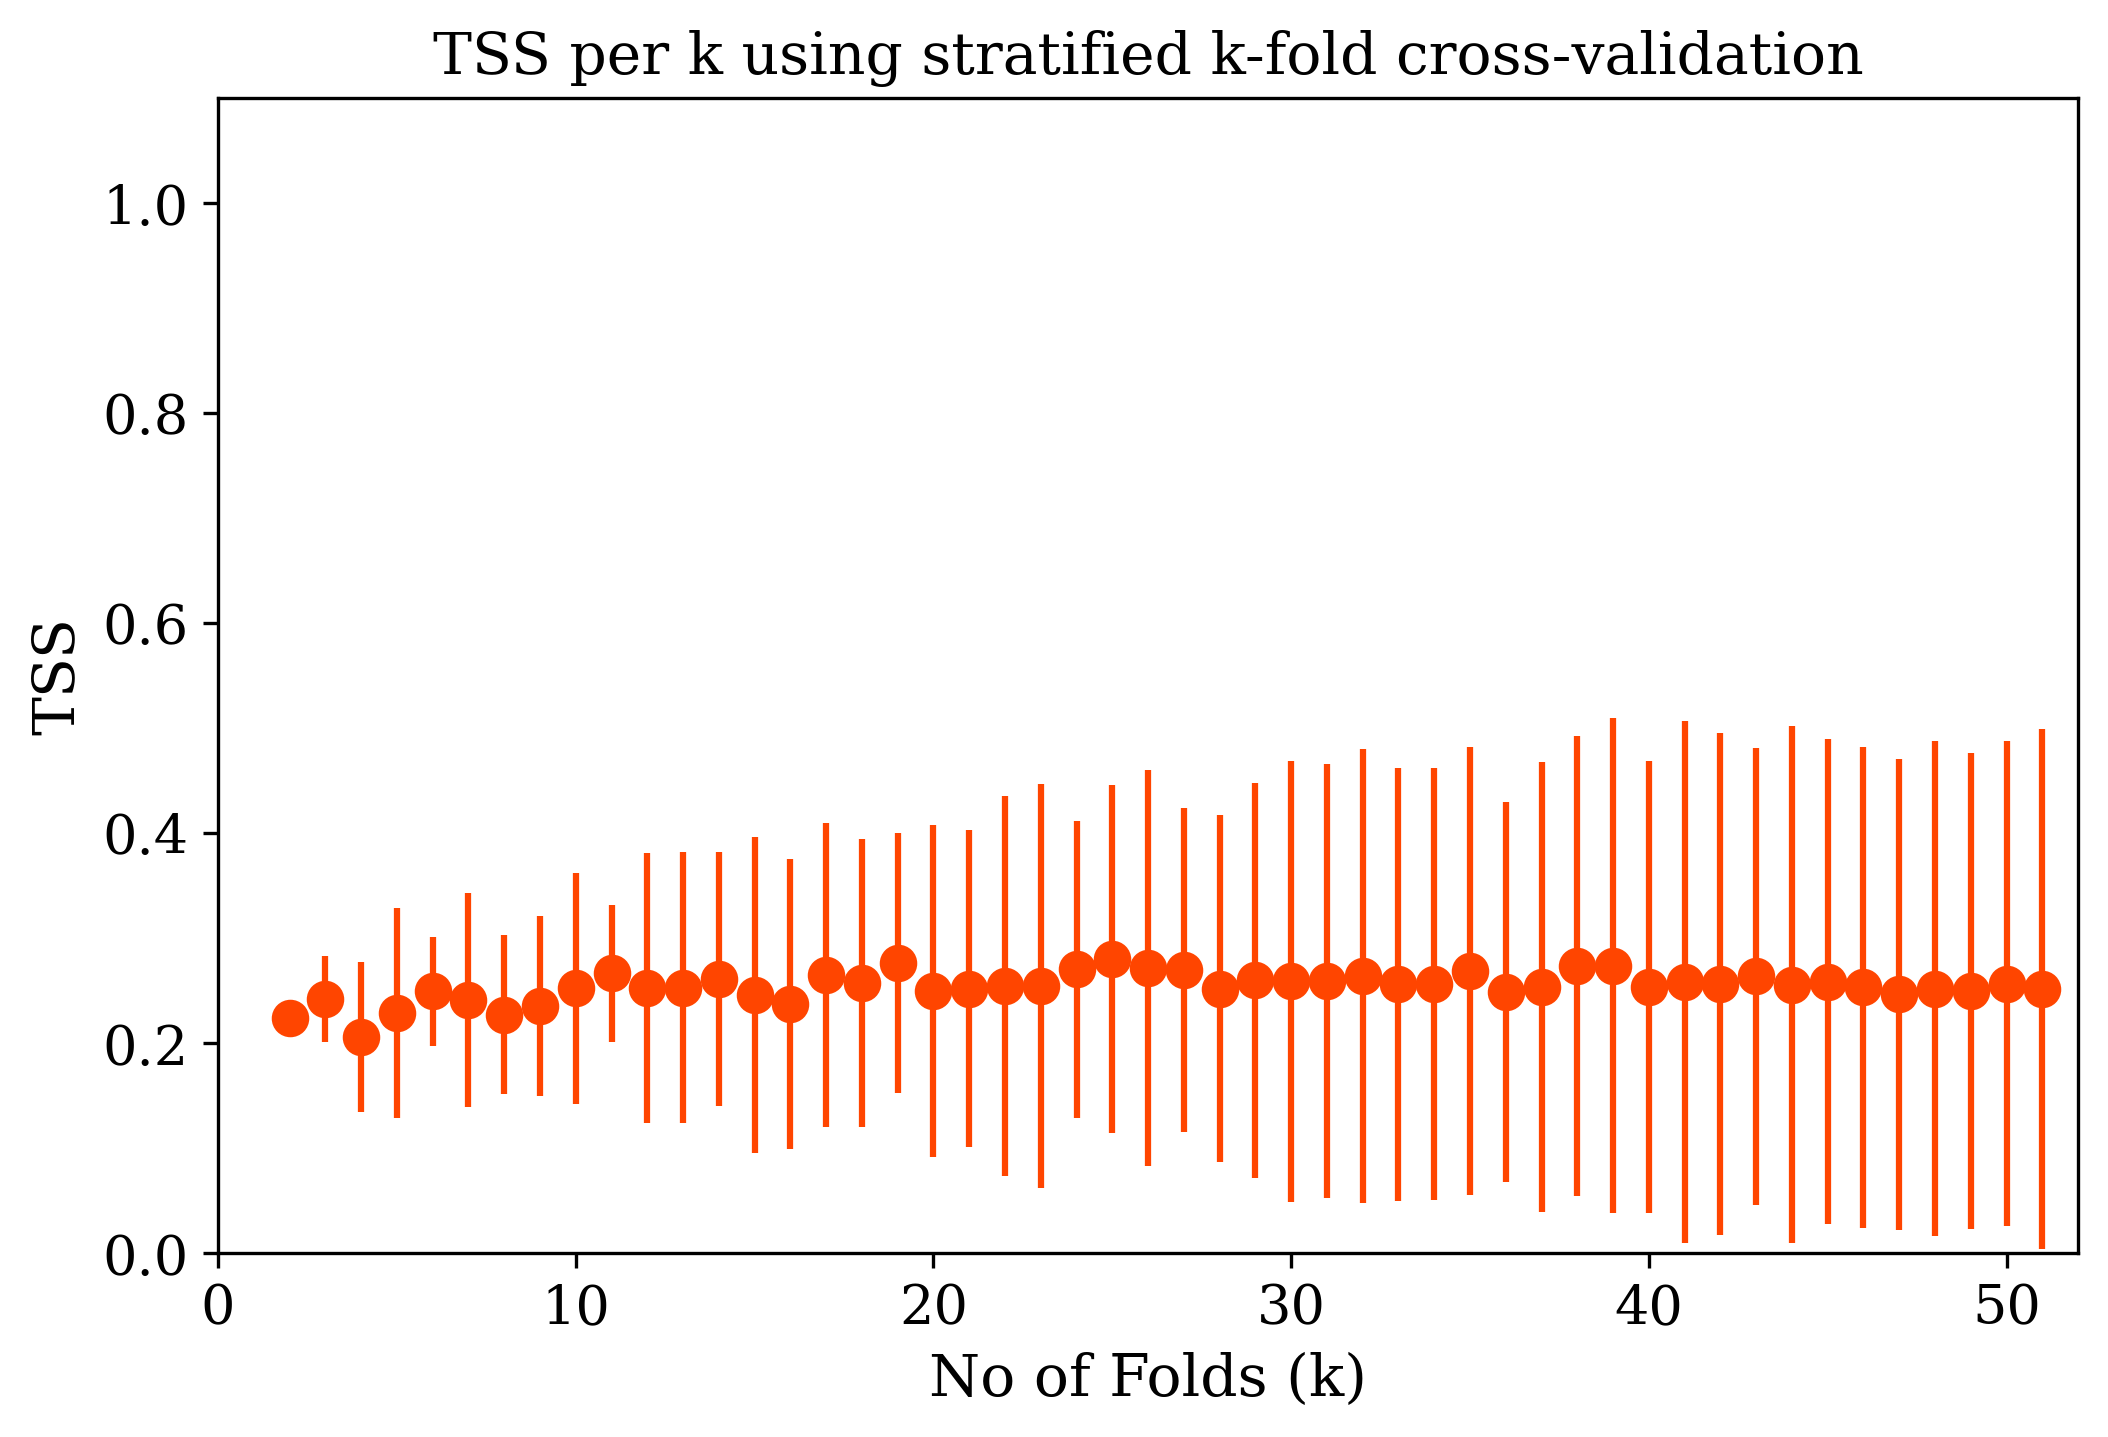

In [28]:
fig, ax = plt.subplots(figsize=(8, 5),dpi = 300)      # define the size of the figure
orangered = (1.0, 0.27, 0, 1.0)              # create an orange-red color
cornblue = (0.39, 0.58, 0.93, 1.0)           # create a cornflower-blue color

# define some style elements
marker_style_red = dict(linestyle='', markersize=8,
                        fillstyle='full', color=orangered, markeredgecolor=orangered)
marker_style_blue = dict(linestyle='', markersize=8,
                         fillstyle='full', color=cornblue, markeredgecolor=cornblue)

# ascribe the data to the axes
k = np.arange(50)+2
for i in range(50):
    if (array_of_avg_TSS[i] > array_of_std_TSS[i]):
        ax.errorbar(k[i], array_of_avg_TSS[i],yerr=array_of_std_TSS[i], linestyle='', color=orangered)
        ax.plot(k[i], array_of_avg_TSS[i], 'o', **marker_style_red)
    if (array_of_avg_TSS[i] <= array_of_std_TSS[i]):
        ax.errorbar(k[i], array_of_avg_TSS[i],yerr=array_of_std_TSS[i], linestyle='', color=cornblue)
        ax.plot(k[i], array_of_avg_TSS[i], 'o', **marker_style_blue)

# set plot limits
plt.xlim(xmax=52, xmin=0)
plt.ylim(ymax=1.1, ymin=0)

# label the axes and the plot
ax.set_xlabel('No of Folds (k)')
ax.set_ylabel('TSS')
plt.title(r'TSS per k using stratified k-fold cross-validation')
fig = plt.gcf()

In [29]:
print("The TSS equals", array_of_avg_TSS[9],"plus or minus", array_of_std_TSS[9], ".")

The TSS equals 0.26650755200911935 plus or minus 0.06499111222268145 .


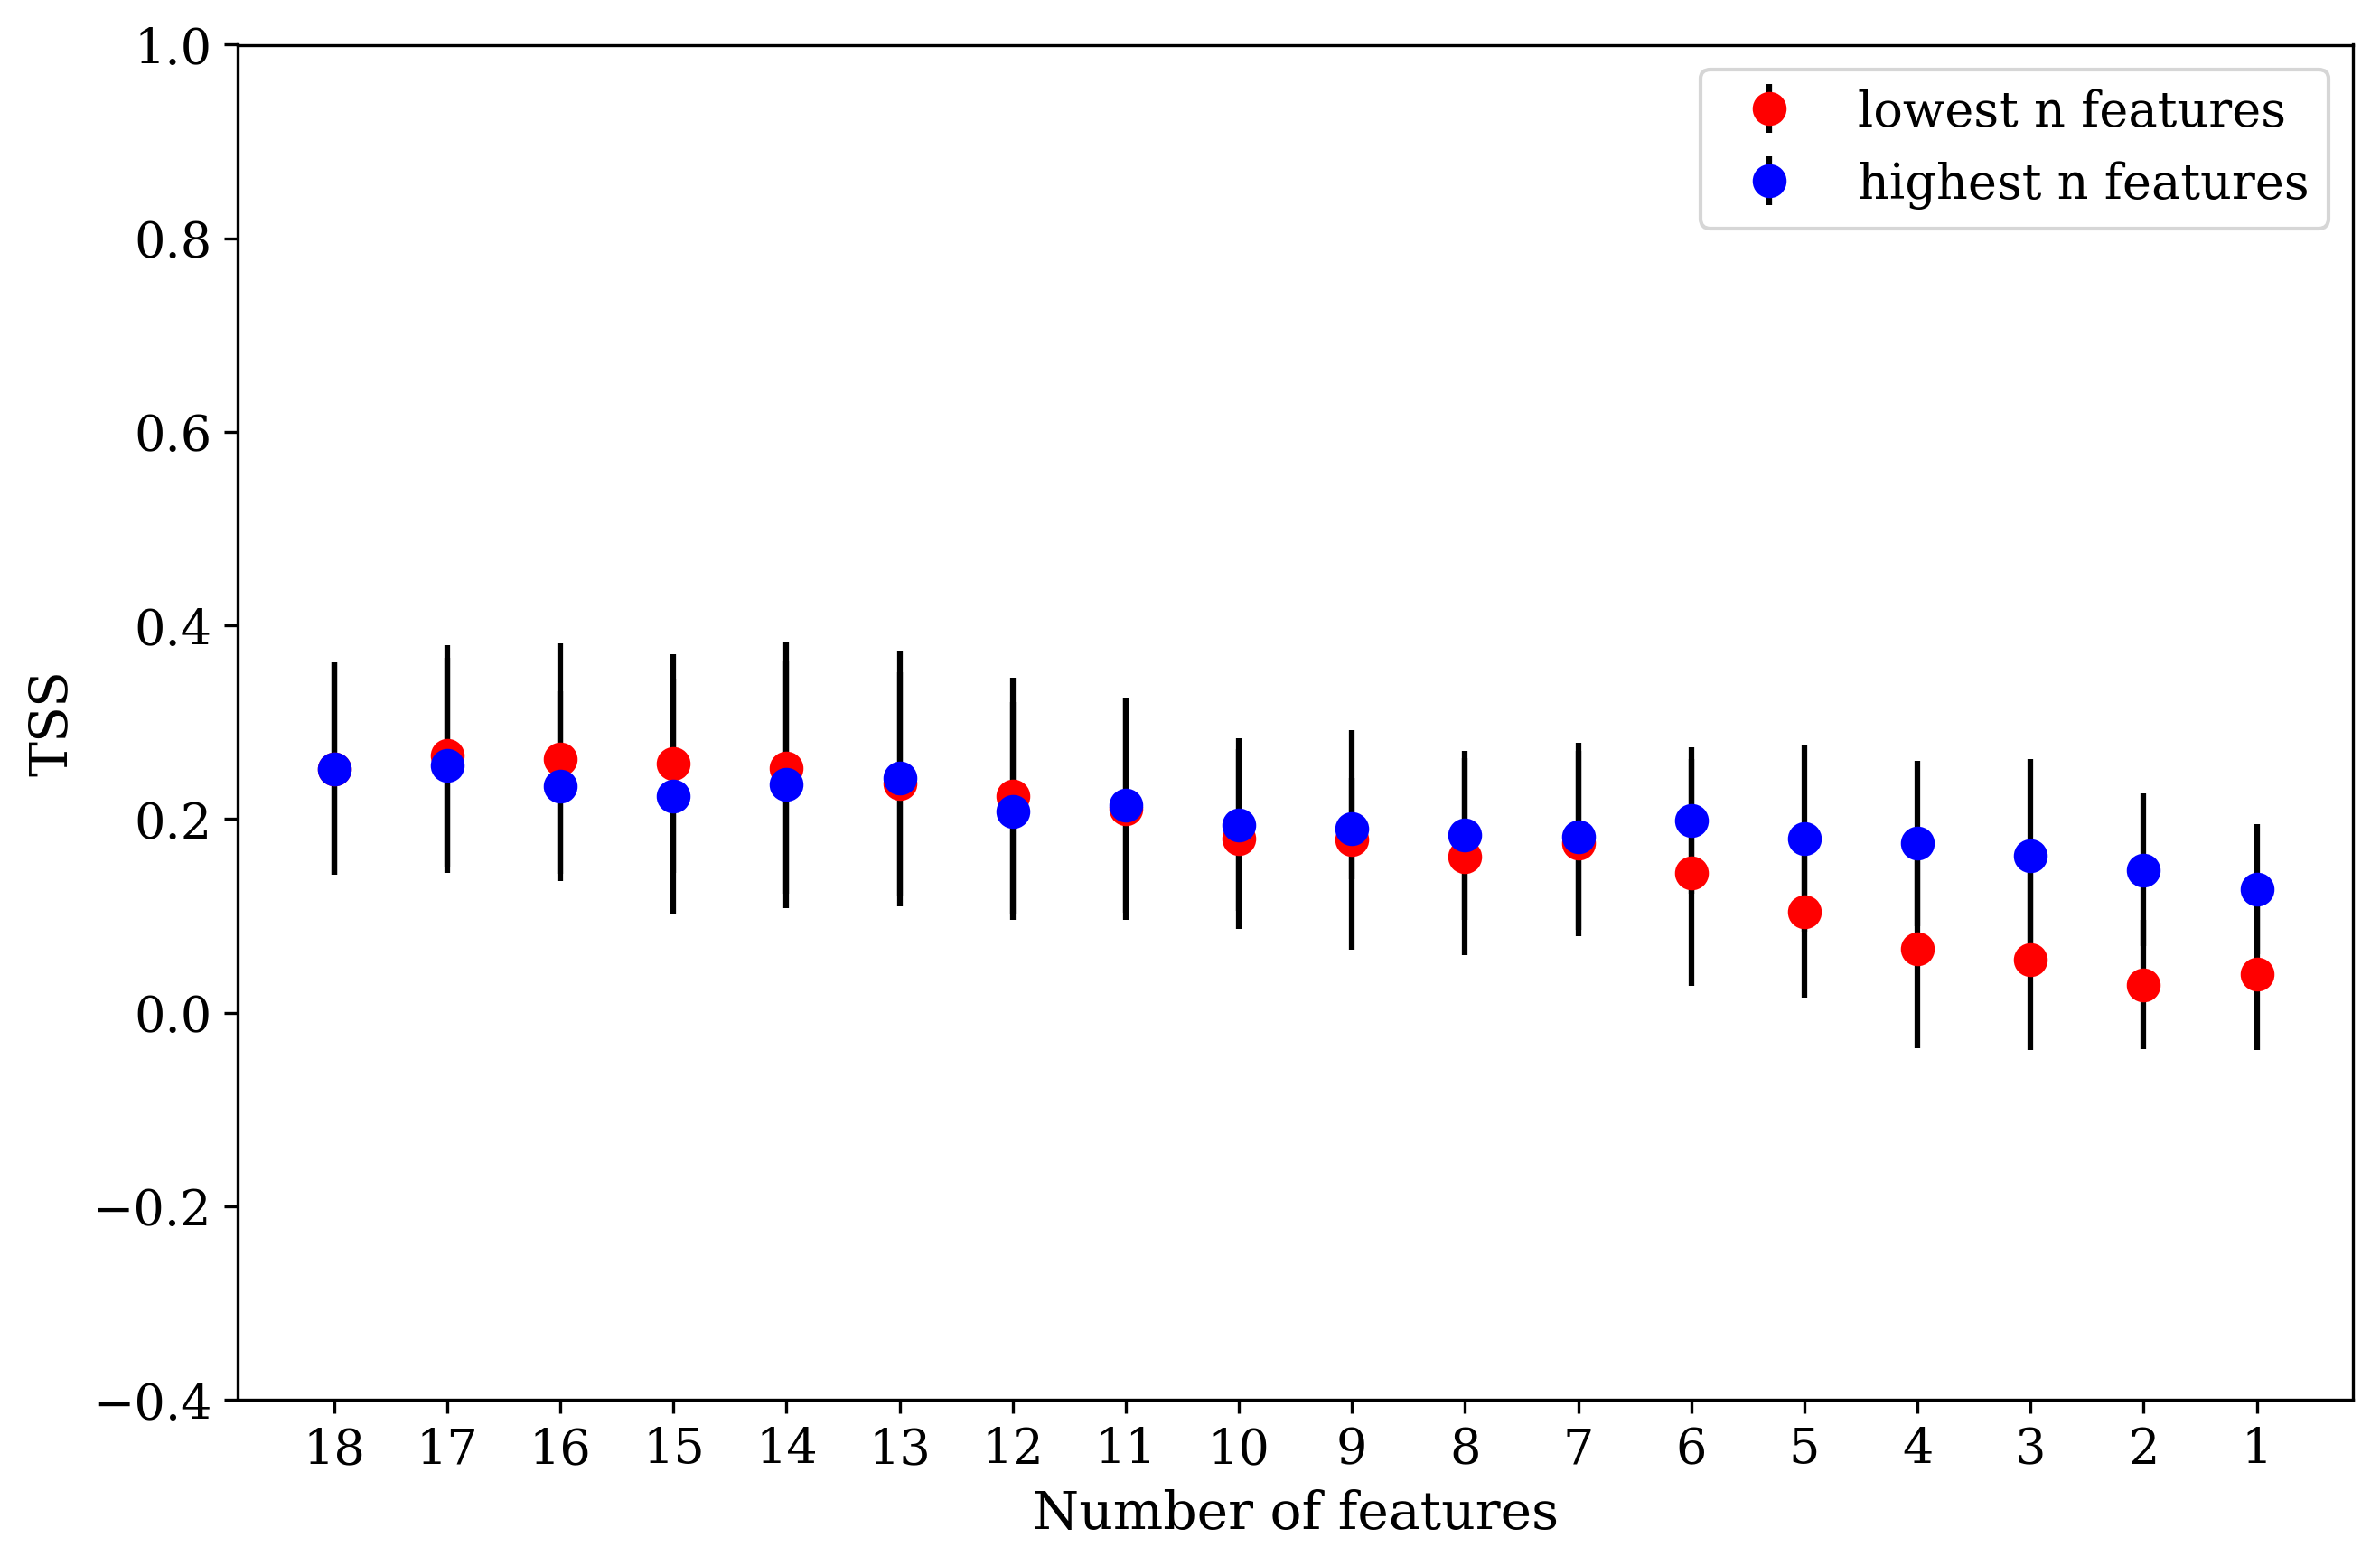

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

num_features = list(range(1, len(ordered_features)+1))

tss_means_high2low = []
tss_stds_high2low = []
tss_means_low2high = []
tss_stds_low2high = []

# High to Low ranking (blue dots)
for k in num_features:
    selected_features = ordered_features[:k]
    selected_indices = [feature_names.index(f) for f in selected_features]
    X_subset = xdata[:, selected_indices]
    skf = StratifiedKFold(n_splits=10, shuffle=True,random_state=42)
    these_TSS_for_this_k = []
    for train_index, test_index in skf.split(X_subset, ydata):
        # xtrain are the examples in the training set
        xtrain = X_subset[train_index]
        # ytrain are the labels in the training set
        ytrain = ydata[train_index]
        # xtest are the examples in the testing set
        xtest = X_subset[test_index]
        ytest = ydata[test_index]    # ytest are the labels in the testing set
        clf.fit(xtrain, ytrain)
        TN, FP, TP, FN = confusion_table(clf.predict(xtest), ytest)
        if (((TP+FN) == 0.0) or (FP+TN) == 0.0):
            these_TSS_for_this_k.append(np.nan)
            continue
        else:
            these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
    TSS_k = np.array(these_TSS_for_this_k)
    mean_tss, std_tss = np.mean(TSS_k), np.std(TSS_k)
    tss_means_high2low.append(mean_tss)
    tss_stds_high2low.append(std_tss)

# Low to High ranking (red dots)
for k in num_features:
    selected_features = ordered_features[::-1][:k]
    selected_indices = [feature_names.index(f) for f in selected_features]
    X_subset = xdata[:, selected_indices]
    skf = StratifiedKFold(n_splits=10, shuffle=True,random_state=42)
    these_TSS_for_this_k = []
    for train_index, test_index in skf.split(X_subset, ydata):
        # xtrain are the examples in the training set
        xtrain = X_subset[train_index]
        # ytrain are the labels in the training set
        ytrain = ydata[train_index]
        # xtest are the examples in the testing set
        xtest = X_subset[test_index]
        ytest = ydata[test_index]    # ytest are the labels in the testing set
        clf.fit(xtrain, ytrain)
        TN, FP, TP, FN = confusion_table(clf.predict(xtest), ytest)
        if (((TP+FN) == 0.0) or (FP+TN) == 0.0):
            these_TSS_for_this_k.append(np.nan)
            continue
        else:
            these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
    TSS_k = np.array(these_TSS_for_this_k)
    tss_means_low2high.append(np.mean(TSS_k))
    tss_stds_low2high.append(np.std(TSS_k))

# Plot
plt.figure(figsize=(9, 6), dpi = 300)
plt.errorbar(num_features, tss_means_low2high, yerr=tss_stds_low2high, color='black', label='lowest n features', fmt='o', markerfacecolor='red', markeredgecolor='red', markersize=8)

plt.errorbar(num_features, tss_means_high2low, yerr=tss_stds_high2low, color='black', label='highest n features', fmt='o', markerfacecolor='blue', markeredgecolor='blue', markersize=8)

plt.xlabel('Number of features')
plt.ylabel('TSS')
plt.xticks(num_features)
plt.yticks(np.arange(-0.4, 1.2, 0.2))

plt.legend()
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

In [31]:
no_features = [i for i in range(1,19)]
table = pd.DataFrame({'Number of features': no_features,
                          'TSS highest to lowest': tss_means_high2low,
                          'Std highest to lowest': tss_stds_high2low,
                          'TSS lowest to highest': tss_means_low2high,
                          'Std lowest to highest': tss_stds_low2high})
table

,Number of features,TSS highest to lowest,Std highest to lowest,TSS lowest to highest,Std lowest to highest
0,1,0.127611,0.067449,0.040078,0.079031
1,2,0.147318,0.078806,0.029095,0.066359
2,3,0.162605,0.099645,0.055169,0.094140
3,4,0.174989,0.085434,0.066292,0.103202
4,5,0.180058,0.096455,0.104518,0.088875
5,6,0.198667,0.075568,0.144844,0.117175
6,7,0.182154,0.096722,0.174994,0.095674
7,8,0.183226,0.087635,0.161317,0.101805
8,9,0.190096,0.051882,0.178616,0.113398
9,10,0.194216,0.088974,0.179615,0.092690
